# **Indirect Time of Flight**

<img src="https://raw.githubusercontent.com/CristianR8/Time-of-flight/main/imagenes/Banner%20Hands-on.png" width="1400" align="middle"/>

# <font color='#ECA702'>**Hands-on Sesión 6: Time of flight**</font>


El "Time of Flight" (ToF) es una técnica de medición que determina la distancia entre un sensor y un objeto al calcular el tiempo que tarda una señal emitida, como un pulso de luz o una onda de sonido, en viajar desde el sensor hasta el objeto y regresar. Esta tecnología se utiliza ampliamente en varias aplicaciones, incluyendo la medición de distancias, la creación de imágenes 3D, y en sensores para robótica y vehículos autónomos.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td style="text-align:center;">
      <img src="/home/cristianr/Sesion6/imagenes/app1.jpg" width="600px"/>
    </td>
    <td style="text-align:center;">
      <img src="/home/cristianr/Sesion6/imagenes/app2.jpg" width="600px"/>
    </td>
  </tr>
</table>


Para esta sesión, trabajaremos con dos tipos de tecnología Time of Flight, cada uno con sus características y aplicaciones específicas:

- Indirect Time of Flight (iToF)
- Direct Time of Flight (dToF)

# <font color='#4C5FDA'>**Indirect Time of flight (iToF)**</font>



El método "Indirect Time of Flight" (iToF) es una técnica utilizada en la medición de distancias y en la generación de imágenes 3D. Este método se basa en la medición del tiempo que tarda la luz en viajar desde una fuente, rebotar en un objeto y volver al sensor. 

En el iToF, la luz, generalmente un haz láser o LED, es modulada con una frecuencia específica antes de ser emitida. Cuando esta luz modulada incide en un objeto y regresa, la señal recibida tendrá un cambio de fase respecto a la señal original emitida. Midiendo este cambio de fase, el sistema puede calcular la distancia al objeto porque el cambio de fase es proporcional al doble de la distancia recorrida por la luz, dado que la luz viaja hacia el objeto y luego regresa.

<div style="text-align: center;">
    <img src="imagenes/itof-image.webp" width="500" style="display: block; margin: auto;">
</div>


# <font color='#4C5FDA'>**Objetivo**</font>

A continuación realizaremos una simulación de un enfoque de medicion de tiempo de vuelo indirecto llamado método de cuadratura. 


El método de cuadratura en el contexto de la estimación de Time of Flight (ToF) indirecto se refiere a un enfoque utilizado para medir la fase de la señal de luz reflejada en comparación con la señal de luz emitida. Este método es una parte crucial del proceso para determinar la distancia basada en la medición de fase, especialmente en sistemas que utilizan la técnica Indirect Time of Flight (iToF).

# <font color='#4C5FDA'>**Instalamos paquetes y librerias**</font>

In [9]:
!pip install gdown
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [10]:
# Importamos datos a usar

!gdown --id '1Bv0Q5QzdX4TEry9c-oCCB-lHsIE1W6eu'

/home/cristianr/anaconda3/lib/python3.11/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Bv0Q5QzdX4TEry9c-oCCB-lHsIE1W6eu
To: /home/cristianr/Sesion6/rami.png
100%|██████████████████████████████████████| 3.76M/3.76M [00:00<00:00, 7.41MB/s]


**<font color='#ECA702'>Paso 1: Simulación de la Señal Reflejada</font>**


Primero, se establecen los parámetros básicos y las ecuaciones necesarias:

- **Frecuencia de Modulación (f):** Se define la frecuencia de la luz modulada, típicamente en MegaHertz (MHz).
- **Longitud de Onda (λ):** La longitud de onda se calcula a partir de la velocidad de la luz (c) y la frecuencia: $\lambda = \frac{c}{f}$
- **Profundidad Máxima (max_depth):** Esto se refiere al rango máximo de medición, que también depende de la frecuencia de modulación y la velocidad de la luz: $\max\_depth = \frac{\lambda}{2}$
- **Amplitud (A):** Este es un parámetro que define la intensidad de la señal de salida.


1. Cálculo de la Fase: 

\begin{align}
\text{phase} &= \frac{2 \cdot d}{\lambda} \cdot 2 \pi \tag{1}
\end{align}

donde $d$ es la distancia medida desde el sensor al objeto.

2. Derivación de la Distancia:

\begin{align}

d &= \frac{c}{2} \cdot \frac{\theta}{2 \pi f} \tag{2} \\
d &= \frac{c}{2} \cdot \frac{\theta}{2 \pi} \cdot \frac{\lambda}{c} \tag{3}

\end{align}

Con esto ya podremos calcular la fase para cada pixel en la imagen a partir de la profundidad con la ecuación (1). En la simulación se define la `frecuencia` en MegaHertz y con esta se pueden encontrar los valores de `wavelength`, `max_depth`, además definimos la amplitud `A`

In [11]:

freq = 15 * 1e6 # en MHz

c = 3e8 # en m/s
wavelength = c / freq # en m
max_depth = wavelength / 2 

A = 0.5


1.2566370614359172 41178.111547662855


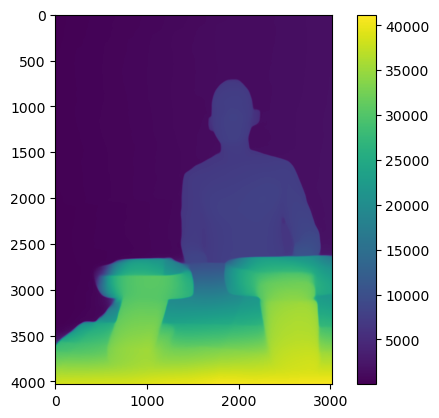

In [13]:
# Cargamos la imagen
image = Image.open('rami.png')

# Convertimos a un array de numpy
depth_img = np.array(image) + 2
(nr, nc) = depth_img.shape
k = 4

fase_img = (2 * depth_img / wavelength) * 2 * np.pi

plt.imshow(fase_img)
plt.colorbar()

print(np.min(fase_img), np.max(fase_img))

**<font color='#ECA702'>Paso 2: Cálculo de Componentes en Cuadratura y Aplicación del Arcotangente</font>**


$$g_{0} = 0, , , $$


Una vez obtenida la matriz de fases, podremos calcular los cuatro términos de cuadratura. Los compnentes representan la señal sinosoidal en diferentes desfases:

- $g_{0} = 0$
- $g_{1} = \frac{\pi}{2}$
- $g_{2} = \pi$
- $g_{3} = \frac{2 \pi}{3}$

Esto se convierte en la funcion sinosoidal desplazada, evaluada en el desfase

$$g_{0} = \cos(θ),g_2 = - sin(θ),g_3 = -\cos(θ),g_4 = sin(θ)$$


Posteriormente utiizamos la función `arctan2` para calcular la fase de la señal combinada:

$$
\begin{align*}
\text{phase\_estimated} = \text{arctan2}\left(\frac{g_{3} - g_{1}}{g_{0} - g_{2}}\right)
\end{align*}
$$

In [15]:
angle =  np.pi

g0 = A / 2 * np.cos(angle)
g1 = - A / 2 * np.sin(angle)
g2 = - A / 2 * np.cos(angle)
g3 = A / 2 * np.sin(angle)

a = np.arctan2(g3 - g1, g0 - g2)

a == angle

True

Text(0.5, 1.0, 'g3')

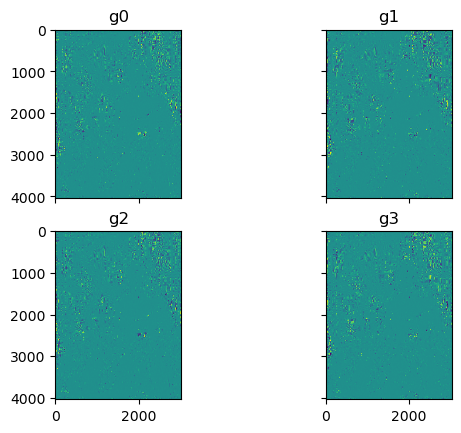

In [16]:
g0 = A / 2 * np.cos(fase_img)
g1 = - A / 2 * np.sin(fase_img)
g2 = - A / 2 * np.cos(fase_img)
g3 = A / 2 * np.sin(fase_img)

# 4 subplots sharing both x/y axes

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0, 0].imshow(g0)
axs[0, 0].set_title('g0')
axs[0, 1].imshow(g1)
axs[0, 1].set_title('g1')
axs[1, 0].imshow(g2)
axs[1, 0].set_title('g2')
axs[1, 1].imshow(g3)
axs[1, 1].set_title('g3')


In [17]:
fases = np.arctan2(g3 - g1, g0 - g2)
print(np.min(fases), np.max(fases))

-3.141592653589793 3.141592653589793


Con la fase estimada calculada, convierte esta fase nuevamente a profundidad usando la ecuación (2).

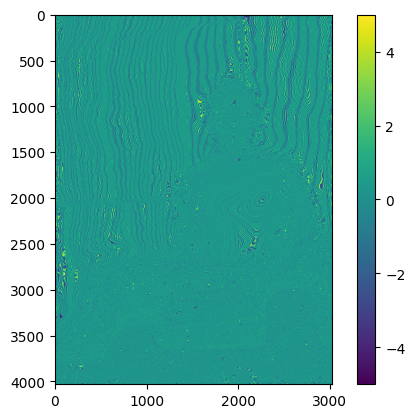

In [ ]:
depth = (c/2) * ( fases / (2 * np.pi * 3e8/(10*2) ) )

plt.imshow(depth)
plt.colorbar()

A continuación estmimamos el error

-5.0 5.0
2 65537


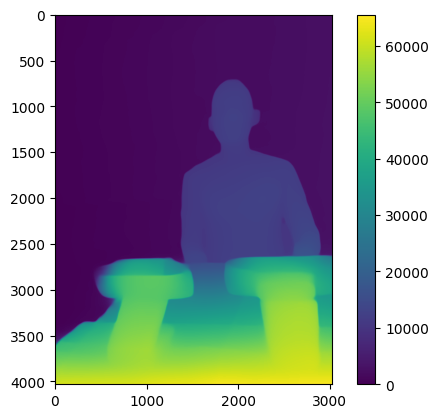

In [ ]:
plt.imshow(depth_img - depth)
plt.colorbar()

print(np.min(depth), np.max(depth))
print(np.min(depth_img), np.max(depth_img))

# **Direct Time of Flight**